In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with cbook.get_sample_data('jacksboro_fault_dem.npz') as file, \
     np.load(file) as dem:
    z = dem['elevation']
    nrows, ncols = z.shape
    x = np.linspace(dem['xmin'], dem['xmax'], ncols)
    y = np.linspace(dem['ymin'], dem['ymax'], nrows)
    x, y = np.meshgrid(x, y)

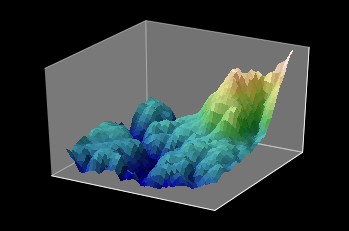

In [3]:
region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()